In [1]:
from tqdm.auto import tqdm
import geopandas as gpd
import pandas as pd
from shapely import box
import matplotlib.pyplot as plt
nz_bounds = box(163.08,-50.12,180,-31.31)

In [2]:
overture = pd.read_csv("https://github.com/UoA-eResearch/overture_nz/raw/main/overture_NZ.csv")
# Add top level category from taxonomy
overture_taxonomy = pd.read_csv("https://raw.githubusercontent.com/OvertureMaps/schema/main/task-force-docs/places/overture_categories.csv", sep=";")
overture_taxonomy["Overture Taxonomy"] = overture_taxonomy["Overture Taxonomy"].apply(lambda s: s.strip("[]").split(","))
overture_taxonomy.set_index("Category code", inplace=True)
overture_taxonomy = overture_taxonomy["Overture Taxonomy"]
overture["top_level_category"] = overture.main_category.apply(lambda c: overture_taxonomy.get(c, [None])[0])
overture = overture[overture.top_level_category == "religious_organization"]
overture = gpd.GeoDataFrame(overture, geometry=gpd.points_from_xy(overture.lng, overture.lat), crs=4326)
overture = overture[overture.within(nz_bounds)]
overture

,name,main_category,alternate_categories,lat,lng,top_level_category,geometry
46,"Oban Presbyterian Church, Stewart Island",church_cathedral,landmark_and_historical_building,-46.896301,168.130206,religious_organization,POINT (168.13021 -46.89630)
88,Bluff New Life Church,church_cathedral,NaN,-46.598960,168.340702,religious_organization,POINT (168.34070 -46.59896)
184,Wicklow Street Seventh-day Adventist Church,church_cathedral,NaN,-46.451117,168.364935,religious_organization,POINT (168.36493 -46.45112)
237,Inspire Community Church Invercargill,pentecostal_church,"community_center,senior_citizen_services",-46.424380,168.350350,religious_organization,POINT (168.35035 -46.42438)
239,New River CMFI Community Church - Southland NZ,religious_organization,NaN,-46.424280,168.350810,religious_organization,POINT (168.35081 -46.42428)
...,...,...,...,...,...,...,...
137288,Bream Bay Assembly of God,religious_organization,"pentecostal_church,community_services_non_profits",-35.882700,174.451380,religious_organization,POINT (174.45138 -35.88270)
137439,Lifepoint Church,church_cathedral,religious_organization,-35.822490,174.452050,religious_organization,POINT (174.45205 -35.82249)
137624,Lighthouse Church,church_cathedral,NaN,-35.634995,174.496478,religious_organization,POINT (174.49648 -35.63499)
137659,Tutukaka Coast Community Church,church_cathedral,community_services_non_profits,-35.627548,174.507135,religious_organization,POINT (174.50713 -35.62755)


In [3]:
overture.main_category.value_counts()

church_cathedral                 1730
religious_organization            637
catholic_church                   212
baptist_church                    168
anglican_church                    89
mosque                             55
buddhist_temple                    38
sikh_temple                        31
hindu_temple                       30
pentecostal_church                 14
mission                             7
evangelical_church                  5
convents_and_monasteries            5
synagogue                           4
jehovahs_witness_kingdom_hall       2
Name: main_category, dtype: int64

In [4]:
OSM = gpd.read_parquet("churches.parquet")
OSM = OSM[OSM.within(nz_bounds)]
OSM

,lat,lng,name,religion,denomination,start_date,geometry
3458,-43.046537,172.784156,St Pauls Glenmark,christian,None,None,POINT (172.78416 -43.04654)
4099,-41.297903,173.016250,Chandrakirti Meditation Centre,buddhist,mahayana,None,POINT (173.01625 -41.29790)
146618,-36.953634,174.846633,Te Kaainga Rua,maori,None,None,POINT (174.84663 -36.95363)
152001,-36.267755,175.491994,St Johns,christian,interdenominational,None,POINT (175.49199 -36.26776)
153660,-36.845395,174.747533,Bishop's Residence,christian,catholic,None,POINT (174.74753 -36.84539)
...,...,...,...,...,...,...,...
1462176,-43.545520,172.665075,None,None,None,None,POINT (172.66508 -43.54552)
1462453,-36.957230,174.911417,None,buddhist,None,None,POINT (174.91142 -36.95723)
1462504,-36.964539,174.784263,The Church of Jesus Christ of Latter-day Saints,christian,mormon,None,POINT (174.78426 -36.96454)
1463003,-41.342699,174.763751,Wat Buddhacheymahaneat Theravada Buddhist Mona...,buddhist,theravada,1985,POINT (174.76375 -41.34270)


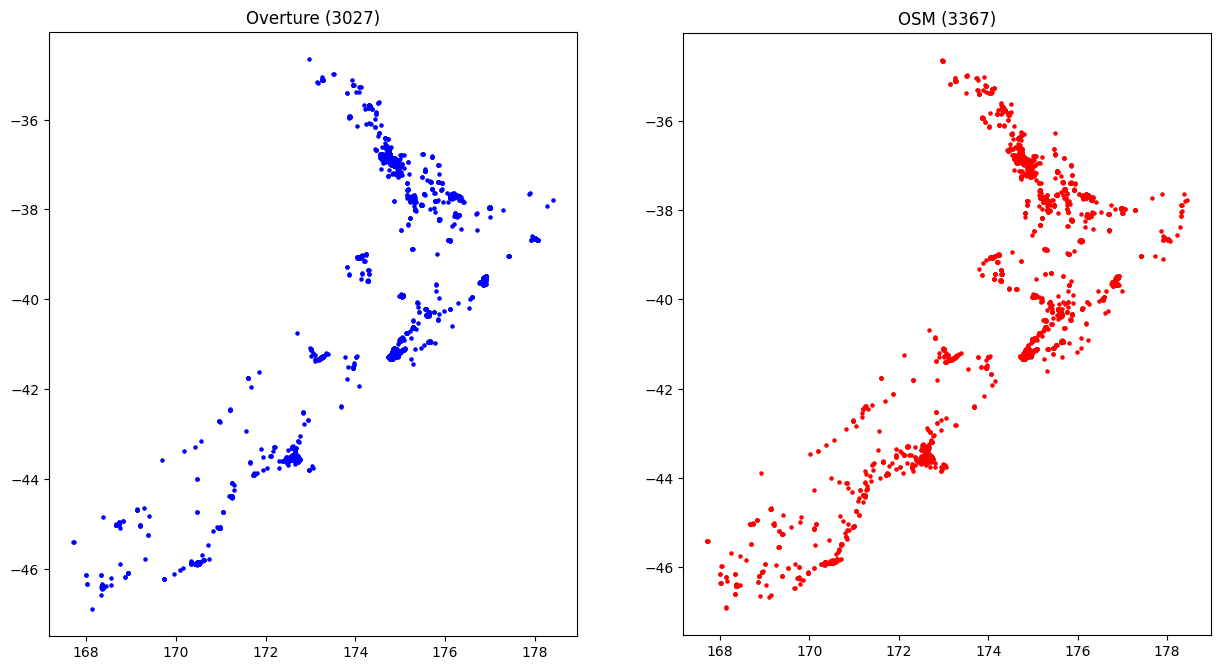

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
overture.plot(ax=ax1, color="blue", markersize=5)
ax1.set_title(f"Overture ({len(overture)})")
OSM.plot(ax=ax2, color="red", markersize=5)
ax2.set_title(f"OSM ({len(OSM)})")
ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.show()